# data analysis from 10/6/2022

See Creating_AverageIVIMCurves.m for the code done to produce the data in the excel sheet

See 20221008SummaryOfResults.docx for summary of the process and results here. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv
import scipy.optimize as op
import scipy.stats as stats
from scipy.optimize import curve_fit
import scipy.io 
from scipy.stats import rice
from mpl_toolkits.mplot3d import Axes3D

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr
from scipy.special import stdtr
import csv
import pandas as pd

import sys 
import os
sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code/"))
from Data20200706 import *

In [5]:
excelsheet = '/Users/neuroimaging/Desktop/MR-Code/Dissertation_Code/AverageIVIMCurves.xlsx'
Data = np.array(np.transpose(pd.read_excel(excelsheet, sheet_name = 'IVIMCurves',header = None)))



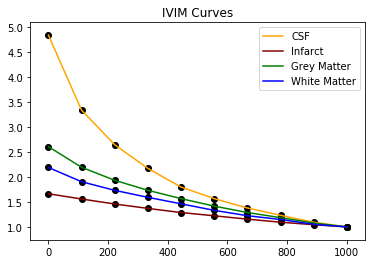

In [17]:
CSF = Data[0]
Infarct = Data[1]
GM = Data[2]
WM = Data[3]
Bvals = [0, 111, 222, 333, 444, 556, 667, 778, 889, 1000]

pl.plot(Bvals,CSF/CSF[-1],color = 'orange',label = 'CSF')
pl.scatter(Bvals,CSF/CSF[-1],color = 'black')
pl.plot(Bvals,Infarct/Infarct[-1],color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[-1],color = 'black')
pl.plot(Bvals,GM/GM[-1],color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,GM/GM[-1],color = 'black')
pl.plot(Bvals,WM/WM[-1],color = 'blue',label = 'White Matter')
pl.scatter(Bvals,WM/WM[-1],color = 'black')
pl.legend()
pl.title('IVIM Curves')
pl.show()


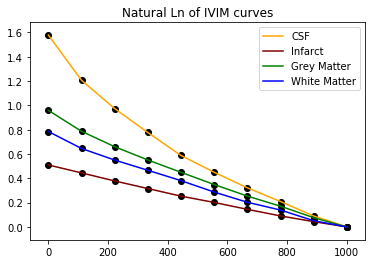

infarct has no perfusion
gm and wm show change around 0 - 200
csf shows potential tri-exp


In [22]:
pl.plot(Bvals,np.log(CSF/CSF[-1]),color = 'orange',label = 'CSF')
pl.scatter(Bvals,np.log(CSF/CSF[-1]),color = 'black')
pl.plot(Bvals,np.log(Infarct/Infarct[-1]),color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,np.log(Infarct/Infarct[-1]),color = 'black')
pl.plot(Bvals,np.log(GM/GM[-1]),color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,np.log(GM/GM[-1]),color = 'black')
pl.plot(Bvals,np.log(WM/WM[-1]),color = 'blue',label = 'White Matter')
pl.scatter(Bvals,np.log(WM/WM[-1]),color = 'black')
pl.legend()
pl.title('Natural Ln of IVIM curves')
pl.show()

print('infarct has no perfusion\ngm and wm show change around 0 - 200\ncsf shows potential tri-exp')

# now trying fit to these equations

In [64]:
def expfunc(b,A,D):
    return A*np.exp(-b*D)
def biexpfunc(b,f,D,Ds):
    return (1-f)*np.exp(-b*D) + f*np.exp(-b*Ds)
def triexpfunc(b,alph,beta,gamm,D,Ds,Dcsf):
    return alph*np.exp(-b*D) + beta*np.exp(-b*Ds) + gamm*np.exp(-b*Dcsf)

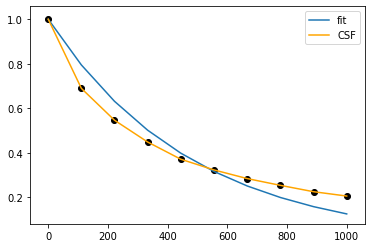

CSF: f, D, Ds
1.078267182607738 0.0020700880510754354 0.0020700509635775467


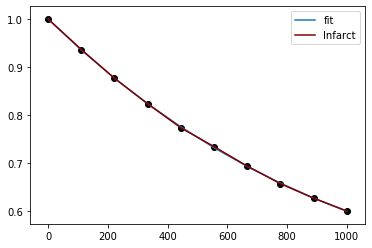

Infarct:  f, D, Ds
0.09925419460214523 0.0007316730565661694 -0.0005200011358501202


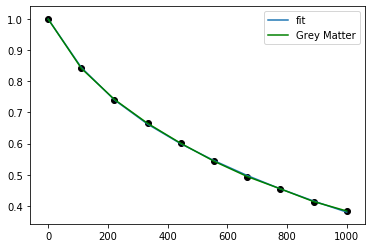

Grey Matter:  f, D, Ds
0.1534623747450445 0.000802102841417883 0.007092013544351539


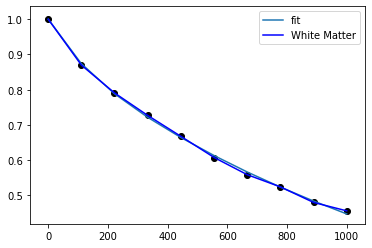

White Matter: f, D, Ds
0.09354877265947453 0.0007059664761381542 0.008714601077670811


In [67]:
Bvals = np.array(Bvals)
#  CSF
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label= 'fit')
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.legend()
pl.show()
print('CSF: f, D, Ds')
print(*popt)


#  Infarct
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,Infarct/Infarct[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,Infarct/Infarct[0],color = 'maroon',label = 'Infarct')
pl.scatter(Bvals,Infarct/Infarct[0],color = 'black')
pl.legend()
pl.show()
print('Infarct:  f, D, Ds')
print(*popt)

#  GM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,GM/GM[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,GM/GM[0],color = 'green',label = 'Grey Matter')
pl.scatter(Bvals,GM/GM[0],color = 'black')
pl.legend()
pl.show()
print('Grey Matter:  f, D, Ds')
print(*popt)

#  WM
p0 = [1,.0001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,WM/WM[0],p0)
pl.plot(Bvals,biexpfunc(Bvals,*popt),label = 'fit')
pl.plot(Bvals,WM/WM[0],color = 'blue',label = 'White Matter')
pl.scatter(Bvals,WM/WM[0],color = 'black')
pl.legend()
pl.show()
print('White Matter: f, D, Ds')
print(*popt)

In [62]:
# Comparing CSF w mono-exp, bi-exp, and tri-exp

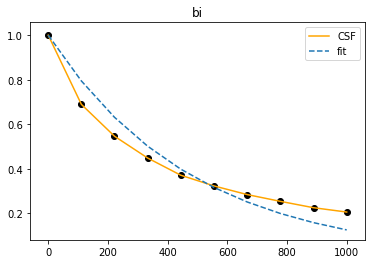

CSF: f, D, Ds
1.078267182607738 0.0020700880510754354 0.0020700509635775467


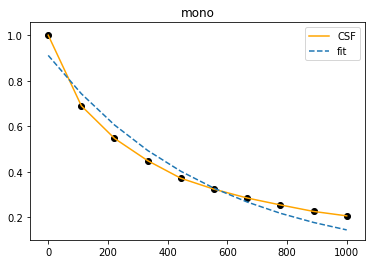

CSF: f, D
0.9112548069235411 0.0018407251520664442


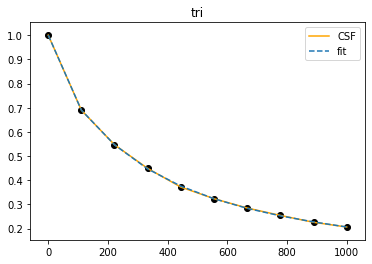

CSF: a,b,c, D1, D2, D3
0.09939757640533287 0.5059970561043655 0.39460536749030506 0.1874083367116468 0.004001690433963624 0.0006938810428892983


In [72]:
#  CSF
p0 = [1,.001,.001]
popt,pcov = curve_fit(biexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,biexpfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('bi')
pl.legend()
pl.show()
print('CSF: f, D, Ds')
print(*popt)

#  CSF
p0 = [1,.001]
popt,pcov = curve_fit(expfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,expfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('mono')
pl.legend()
pl.show()
print('CSF: f, D')
print(*popt)

#  CSF
p0 = [.3,.3,.3,.001,.001,.001]
popt,pcov = curve_fit(triexpfunc,Bvals,CSF/CSF[0],p0)
pl.plot(Bvals,CSF/CSF[0],color = 'orange',label = 'CSF')
pl.plot(Bvals,triexpfunc(Bvals,*popt),label= 'fit',linestyle = '--')
pl.scatter(Bvals,CSF/CSF[0],color = 'black')
pl.title('tri')
pl.legend()
pl.show()
print('CSF: a,b,c, D1, D2, D3')
print(*popt)